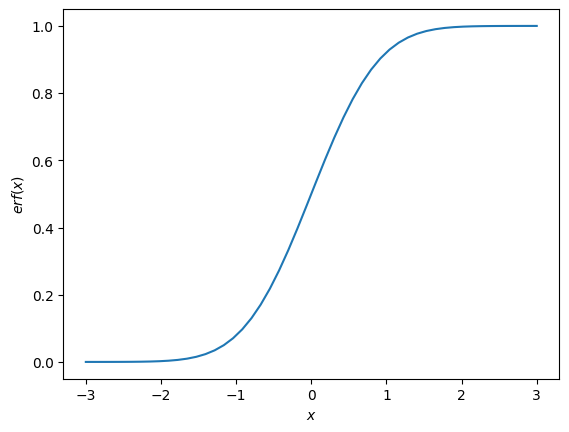

In [17]:
import numpy as np

from scipy import special

import matplotlib.pyplot as plt

x = np.linspace(-3, 3)

plt.plot(x, 0.5 * (1 + special.erf(x)))

plt.xlabel('$x$')

plt.ylabel('$erf(x)$')

plt.show()

In [18]:
from scipy.stats import norm

In [19]:
from scipy.optimize import minimize_scalar

In [20]:
norm.cdf(0, loc=0.0, scale = 1)

0.5

In [21]:
a = np.eye(2) * 0.5

In [22]:
a * np.eye(2)

array([[0.5, 0. ],
       [0. , 0.5]])

In [121]:
class Classifier:
    def __init__(self, ratio, skill, varscale = 1.0):
        self.skill = skill
        self.ratio  = ratio
        self.selectivity = 1 / ratio
        self.n = ratio + 1
        self.varscale = varscale

        #distribution of Y = 0 (reject) given X (data)
        self.false = lambda x: norm.cdf(x, loc=0.0, scale=varscale)
        #distribution of Y = 1 (accept) given X (data)
        self.true = lambda x: norm.cdf(x, loc=skill, scale=varscale)
        #data rejected given a threshold
        #assume the selectivity we're giving reflects the ratio of the true scores generated
        self.reject = lambda x: ((self.ratio) * self.false(x) + self.true(x))/ self.n
        #data accepted given a threshold
        self.accept = lambda x: 1.0 - self.reject(x)
        self.ratio_fn = lambda x: self.accept(x) / self.reject(x)
        self.threshold = self.solve_ratio()

        self.tn = self.false(self.threshold) * (ratio / self.n)
        self.fn = self.true(self.threshold) * (1 / self.n)
        self.tp = (1.0 - self.true(self.threshold)) * (1 / self.n)
        self.fp = (1.0 - self.false(self.threshold)) * (ratio / self.n)

        self.confusion = np.array([[self.tn, self.fn], [self.fp, self.tp]])

    def solve_ratio(self):
        opt_fn = lambda x: np.abs(self.selectivity - self.ratio_fn(x))
        soln = minimize_scalar(opt_fn, bounds=(0.0, 20.0))
        if soln.success:
            return soln.x
        else:
            print("Solving for classification threshold failed")

In [122]:
xs = np.linspace(-3.0, 9.0, 101)

In [129]:
c1 = Classifier(20, 2.0, 1.0)

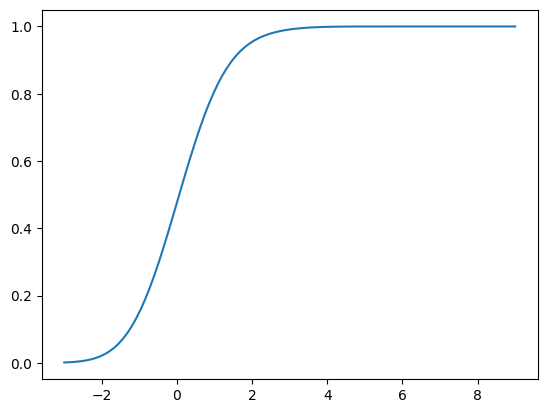

In [130]:
plt.plot(xs, c1.reject(xs))

In [131]:
c1.threshold

1.970226722727573

In [132]:
c1.confusion

array([[0.92913696, 0.023244  ],
       [0.023244  , 0.02437505]])

In [133]:
np.sum(c1.confusion)

0.9999999999999999

In [134]:
np.sum(c1.confusion, axis=1)

array([0.95238095, 0.04761905])